In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(url,error_bad_lines = False)
df.describe(include='all')
                 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-05-14 18:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [3]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
sample_df = df[['T1','Appliances']].sample(15, random_state=2)

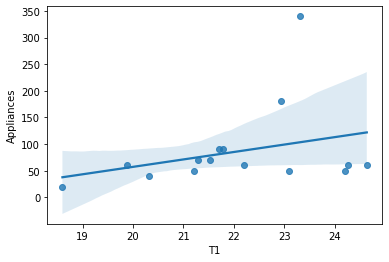

In [5]:
sns.regplot(x='T1',y = 'Appliances', data=sample_df)

In [43]:
s_df = df.drop(columns= ['date'])

In [17]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
feature_df = normalized_df['T2']
target = normalized_df['T6']
X = feature_df[:, np.newaxis]

In [46]:
#splitting the dataset into training and tsting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (feature_df,target,test_size=0.3,random_state=42)


In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [49]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge (alpha = 0.4)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.4)

In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fitting model to training set
linear_model.fit(x_train, y_train)
#obtaining prediction
predicted_values = linear_model.predict(x_test)

In [21]:
#R2- r squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

In [31]:
print(linear_model.coef_)

print(linear_model.intercept_)

[0.8910771]
0.13176427761888537


In [39]:
sf = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
sf

,Actual,Predicted
8980,0.211427,0.239289
2754,0.250182,0.467942
9132,0.168777,0.231085
14359,0.501383,0.636355
8875,0.155193,0.155299
...,...,...
831,0.179450,0.461897
10993,0.428613,0.332564
11761,0.455974,0.300177
12364,0.560638,0.429726


In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae,2)

0.08

In [24]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss,2)

66.12

In [50]:
#rmse-root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.088

In [51]:
def get_weights_df(model,feat,col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [52]:
#comparing effect of regularization
linear_model_weights = get_weights_df(linear_model,x_train,'Linear_Model_Weights')
lasso_weights_df = get_weights_df(lasso_reg,x_train, 'Lasso_Weight')
ridge_weights_df = get_weights_df(ridge_reg,x_train,'Ridge_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df,on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')    
final_weights

,Features,Linear_Model_Weights,Ridge_Weight,Lasso_Weight
0,rv2,-2.406864e+10,0.000748,-0.000000
1,RH_2,-4.566949e-01,-0.411071,-0.000000
2,T_out,-3.218284e-01,-0.262172,0.000000
3,T2,-2.361801e-01,-0.201397,0.000000
4,T9,-1.899271e-01,-0.188916,-0.000000
5,RH_8,-1.575997e-01,-0.156830,-0.000110
6,RH_out,-7.764604e-02,-0.054724,-0.049557
7,RH_7,-4.459808e-02,-0.045977,-0.000000
8,RH_9,-3.980964e-02,-0.041367,-0.000000
9,T5,-1.566424e-02,-0.019853,-0.000000


In [45]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(s_df), columns=s_df.columns)
feature_df = normalized_df.drop(columns = ['lights','Appliances'])
target = normalized_df['Appliances']